
This is an example digital architecture based on Eyeriss by Yu-Hsin Chen, Tushar
Krishna, Joel Emer, and Vivienne Sze.

Some of the important variables for example_traditional:

- *TECHNOLOGY*: 5 nm
- *SUPPORTED_INPUT_BITS*: 8 bit(s)
- *SUPPORTED_OUTPUT_BITS*: 16 bit(s)
- *SUPPORTED_WEIGHT_BITS*: 8 bit(s)
- *GLOBAL_CYCLE_SECONDS*: 6.7e-10 clock period

Components are defined the following places:
- workspace/models/arch/1_macro/example_traditional/example_components/components.csv
- workspace/models/arch/1_macro/example_traditional/components.yaml
- The top-level components locations
  - workspace/models/components/components/*.yaml
  - workspace/models/components/components/accelergy_plug_ins/*.py
  
Place new components in any of these places!



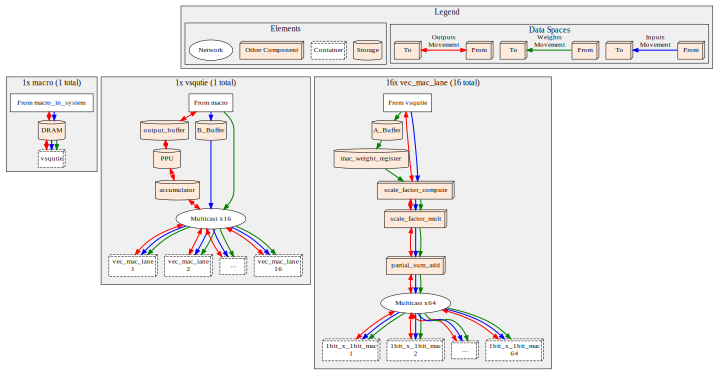

In [74]:
from _tests import scripts
from scripts.notebook_utils import *

display_markdown(
    f"""
This is an example digital architecture based on Eyeriss by Yu-Hsin Chen, Tushar
Krishna, Joel Emer, and Vivienne Sze.

{get_important_variables_markdown('example_traditional')}

Components are defined the following places:
- workspace/models/arch/1_macro/example_traditional/example_components/components.csv
- workspace/models/arch/1_macro/example_traditional/components.yaml
- The top-level components locations
  - workspace/models/components/components/*.yaml
  - workspace/models/components/components/accelergy_plug_ins/*.py
  
Place new components in any of these places!

"""
)
display_diagram(get_diagram("example_traditional", ignore=DIAGRAM_DEFAULT_IGNORE))


   ### Area and energy breakdown
   This example architecture doesn't have a suite of tests, but you may
   look at the other example architectures for inspiration.        
   

100%|██████████| 1/1 [00:19<00:00, 19.25s/it]


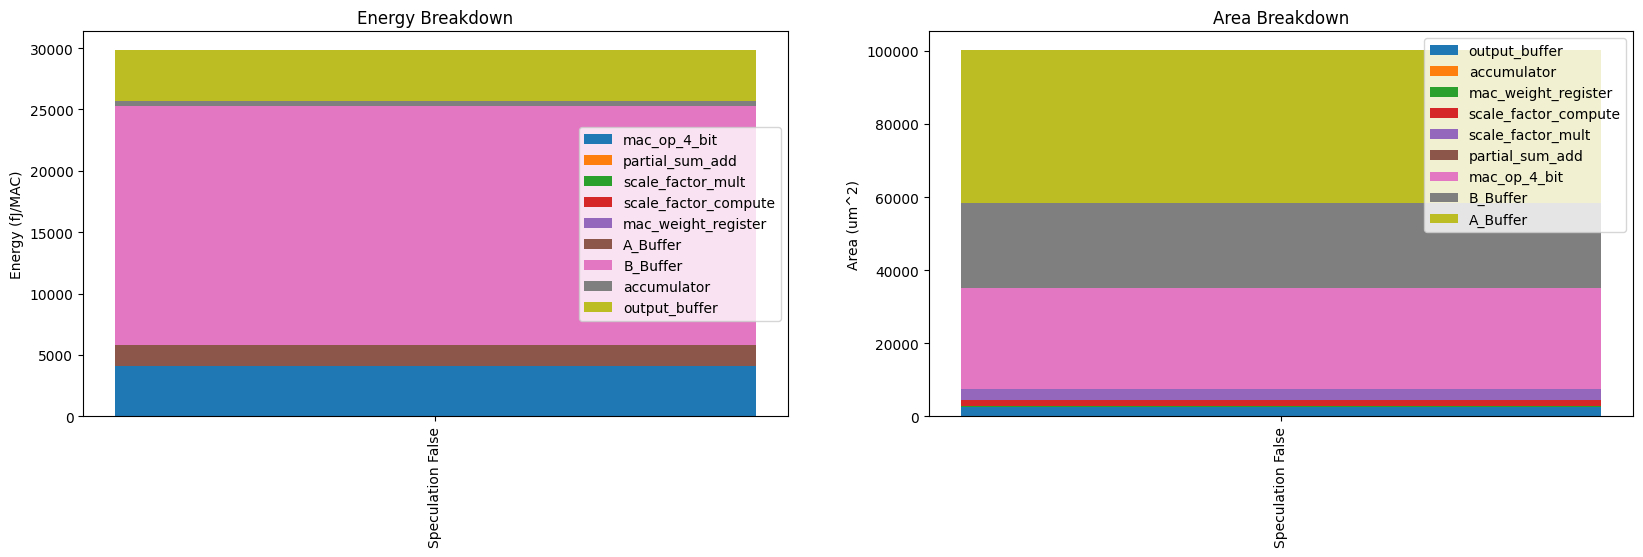

In [3]:
result = run_test("example_traditional", "test_area_energy_breakdown")
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
bar_stacked(
    {f"Speculation {r.variables['QUANTIZE']}": r.per_compute('per_component_energy')*1e15 for r in result},
    ylabel="Energy (fJ/MAC)",
    title=f"Energy Breakdown",
    ax=axs[0]
)
bar_stacked(
    {f"Speculation {r.variables['QUANTIZE']}": r.per_compute('per_component_area')*1e12 for r in result},
    ylabel="Area (um^2)",
    title=f"Area Breakdown",
    ax=axs[1]
)


   ### Area and energy breakdown
   This example architecture doesn't have a suite of tests, but you may
   look at the other example architectures for inspiration.        
   

100%|██████████| 5/5 [00:20<00:00,  4.10s/it]


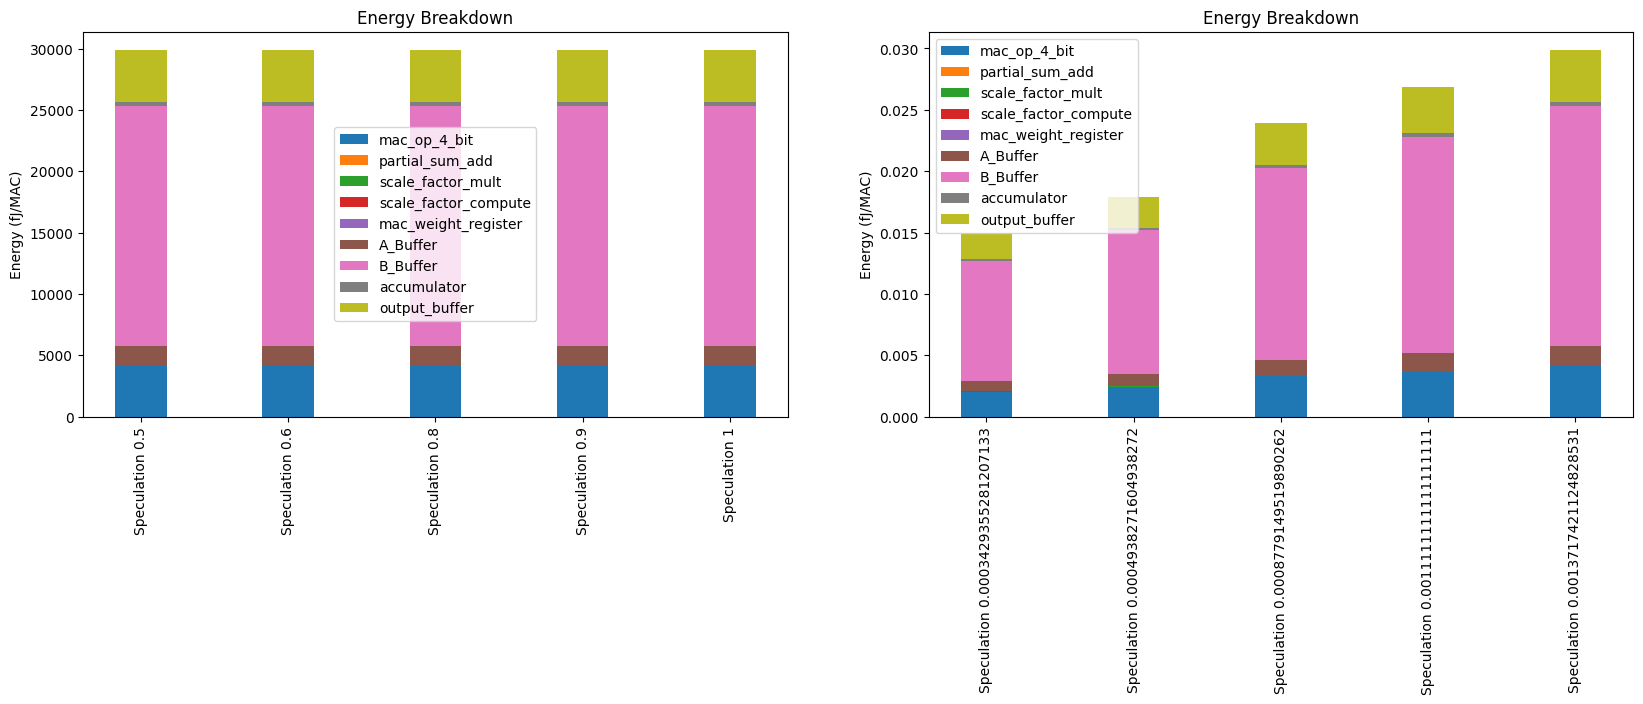

In [106]:
result = run_test("example_traditional", "test_area_energy_breakdown")
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
bar_stacked(
    {f"Speculation {r.variables['VOLTAGE']}": r.per_compute('per_component_energy')*1e15 for r in result},
    ylabel="Energy (fJ/MAC)",
    title=f"Energy Breakdown",
    ax=axs[0]
)
bar_stacked(
    {f"Speculation {r.variables['VOLTAGE_ENERGY_SCALE']}": 1/ (r.per_compute('per_component_energy') / r.variables['GLOBAL_CYCLE_SECONDS']) for r in result},
    ylabel="Energy (fJ/MAC)",
    title=f"Energy Breakdown",
    ax=axs[1]
)

97612341602083.27
67790289952668.36
38134814405129.53
30131947395887.293
24407348595853.066
5


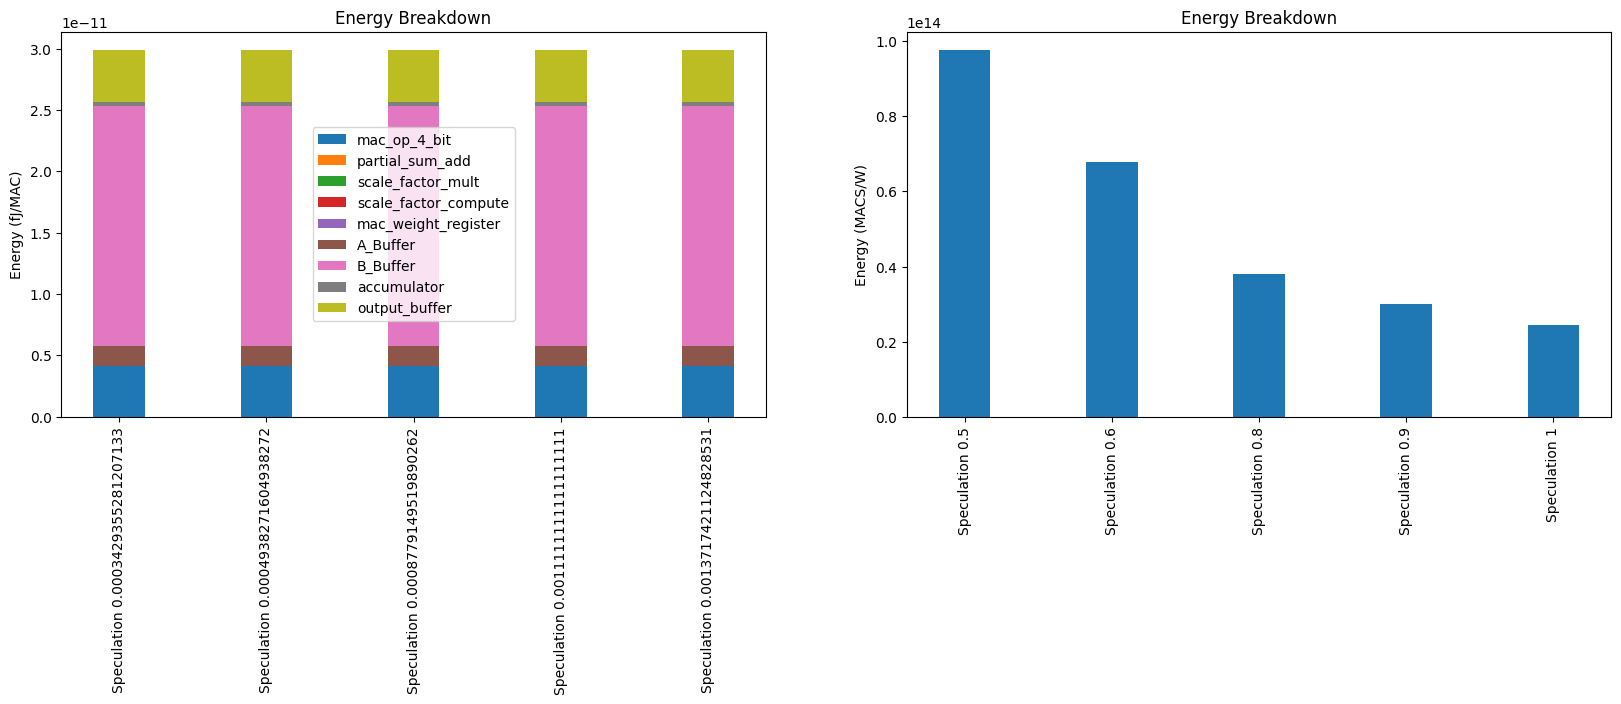

In [107]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
results = []
voltages = []
for r in result:
    output = 0
    for key, entry in r.per_compute('per_component_energy').items():
        output += entry
    results.append(1 / (output * r.variables['VOLTAGE_ENERGY_SCALE']))
    voltages.append(r.variables['VOLTAGE'])
    print(results[-1])
print(len(results))
bar_stacked(
    {f"Speculation {voltages[i]}": results[i] for i in range(len(results))},
    ylabel="Energy (MACS/W)",
    title=f"Energy Breakdown",
    ax=axs[1]
)
bar_stacked(
    {f"Speculation {r.variables['VOLTAGE_ENERGY_SCALE']}": r.per_compute('per_component_energy') for r in result},
    ylabel="Energy (fJ/MAC)",
    title=f"Energy Breakdown",
    ax=axs[0]
)

In [153]:
!tl mapper /home/workspace/scripts/../outputs/237.281472846939168/parsed-processed-input.yaml

Running apps: mapper
Found parsed-processed-input.yaml in input files. Running Timeloop without parsing or processing steps. If this is not the intended behavior, please name the input files differently.
input file: /home/workspace/outputs/237.281472846939168/parsed-processed-input.yaml
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
execute:/usr/local/bin/accelergy /home/workspace/outputs/237.281472846939168/parsed-processed-input.yaml --oprefix timeloop-mapper. -o ./ > timeloop-mapper.accelergy.log 2>&1
Generate Accelergy ERT (energy reference table) to replace internal energy model.
Generate Accelergy ART (area reference table) to replace internal area model.
Architecture configuration complete.
Sparse optimization configuration complete.

A_Buffer ratio: 0.40965732087227413
B_Buffer ratio: 4.750778816199377
accumulator ratio: 0.08489096573208721
output_buffer 2.5221399999999997e-09
accumulator 1.6843899999999998e-10
mac_weight_register 2.8073119999999998e-11
scale_factor_compute 1.863136e-09
scale_factor_mult 2.7947040000000003e-09
partial_sum_add 2.447008e-10
mac_op_4_bit 2.7384676352e-08
B_Buffer 2.34645e-08
A_Buffer 4.183904e-08


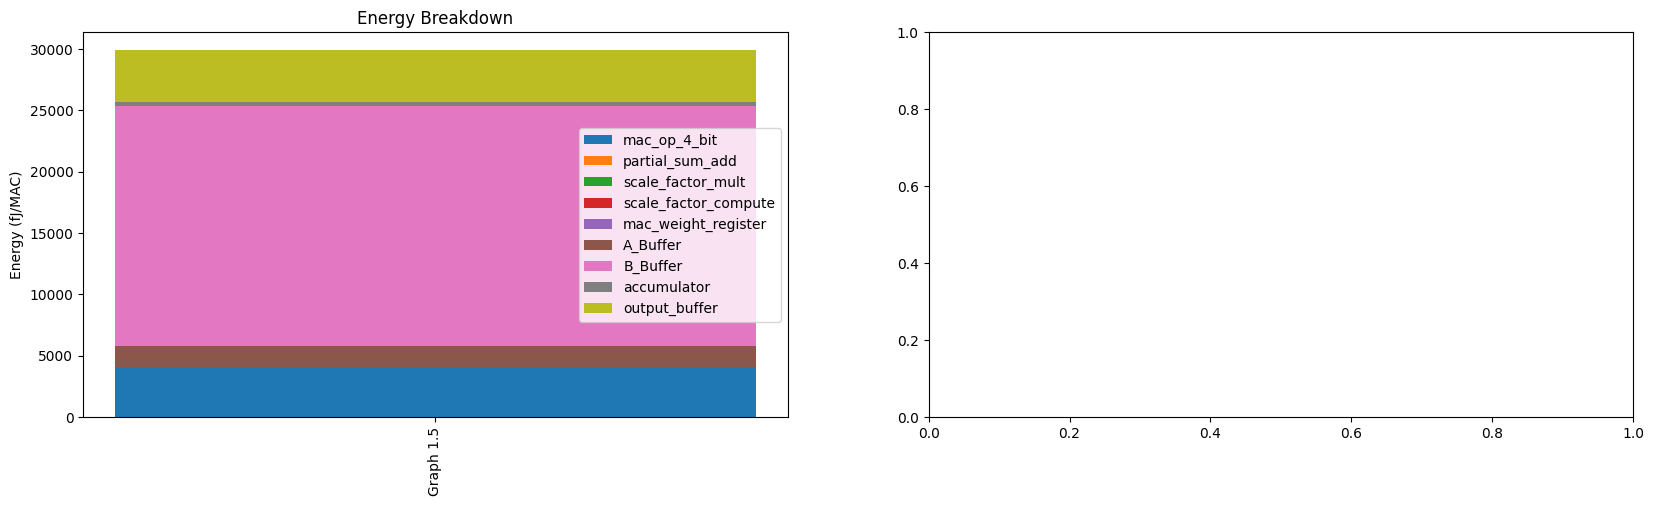

In [28]:
for r in result:
    stats = r.per_compute('per_component_energy')
    # for key in stats:
    #     print(key)
    def prop_energy(key_name):
        key_prop_stat = stats[key_name]
        mac_op_4_bit = stats['mac_op_4_bit']
        print(f"{key_name} ratio: {key_prop_stat / mac_op_4_bit}")
    prop_energy('A_Buffer')
    prop_energy('B_Buffer')
    prop_energy('accumulator')
for r in result:
    for key, value in r.per_compute('per_component_area').items():
        print(key + " " + str(value))
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

bar_stacked(
    {f"Graph {r.variables['VOLTAGE']}": r.per_compute('per_component_energy')*1e15 for r in result},
    ylabel="Energy (fJ/MAC)",
    title=f"Energy Breakdown",
    ax=axs[0]
)